In [1]:
import random
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# init constant from Hodgkin-Huxley model

g_L = 0.3
g_K = 36.0
g_Na = 120.0
E_L = -54.387
E_K = -77.0
E_Na = 50.0
C_m = 1.0

init_val = [-60, 0.32, 0.053, 0.6]

In [3]:
alpha_m = lambda V: 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))
beta_m = lambda V: 4 * np.exp(-0.0556 * (V + 65))

alpha_h = lambda V: 0.07 * np.exp(-0.05 * (V + 65))
beta_h = lambda V: 1 / (1 + np.exp(-0.1 * (V + 35)))

alpha_n = lambda V: 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))
beta_n = lambda V: 0.125 * np.exp(-0.0125 * (V + 65))


def I_Na(V, m, h):
    return g_Na * m ** 3 * h * (V - E_Na)


def I_K(V, n):
    return g_K  * n ** 4 * (V - E_K)


def I_L(V):
    return g_L * (V - E_L)


def derivatives(values, time, I, x=0, y=1):
    V, n, m, h = values
    
    dV_dt = (I(time, x, y) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dn_dt = alpha_n(V) * (1.0 - n) - beta_n(V) * n
    dm_dt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
    dh_dt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
    
    return dV_dt, dn_dt, dm_dt, dh_dt

In [4]:
def plot_results(V_, n_, m_, h_):
    plt.figure(figsize=(15, 10))

    plt.subplot(7, 1, 1)
    plt.ylabel('V(t)')
    plt.plot(t, V_)

    plt.subplot(7, 1, 2)
    plt.ylabel('m(t), n(t), h(t)')
    plt.plot(t, m_, 'y', label='m')
    plt.plot(t, h_, 'r', label='h')
    plt.plot(t, n_, 'c', label='n')
    plt.legend()

    plt.subplot(7, 1, 3)
    plt.ylabel('I(t)')
    I_ = list(map(I_t, t))
    plt.plot(t, I_)
    
    plt.subplot(7, 1, 4)
    plt.ylabel('V(n)')
    plt.plot(n_, V_)

    plt.subplot(7, 1, 5)
    plt.ylabel('V(m)')
    plt.plot(m_, V_)
             
    plt.subplot(7, 1, 6)
    plt.ylabel('V(h)')
    plt.plot(h_, V_)

    plt.show()

In [5]:
def I_t(t, x=0, y=1):
    for i in range(len(current)):
        if t < intervals[i]:
            return current[i]
        else:
            t -= intervals[i]
            if t > gap:
                t -= gap
            else:
                return 0
    return 0

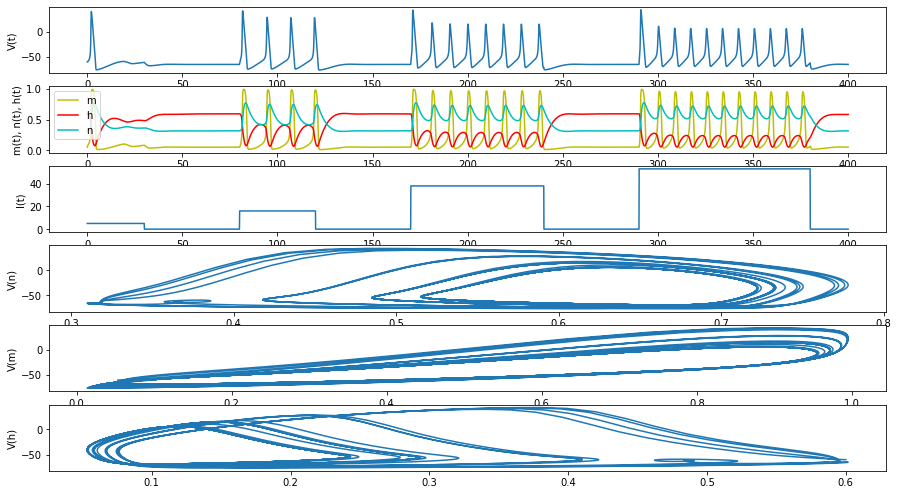

In [6]:
gap = 50
intervals = [30, 40, 70, 90]
current = [5, 16, 38, 53]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t, ))

V_, n_, m_, h_ = y.T


plot_results(V_, n_, m_,  h_)

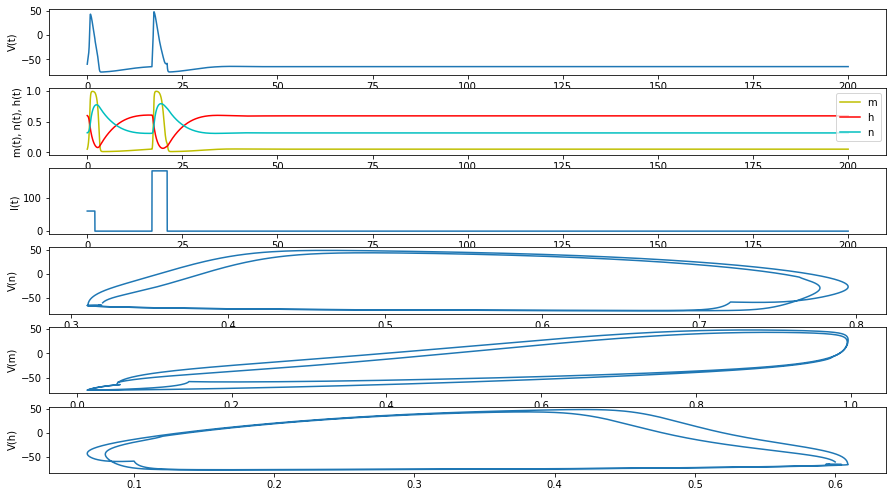

In [7]:
current = [60, 180]
intervals = [2, 4]
gap = 15

t = np.arange(0.0, 200.0, 0.005)
y = odeint(derivatives, init_val, t, args=(I_t, ))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

# Анализ
1. С ростом силы тока увиличивается амплитуда первого спайка.
2. С ростом силы тока пропадает затухание после спайков. 
3. С ростом тока амплетуда большенства спайков (кроме первых) падает.
4. Графики фазового пространства зациклены, что говорит о том, что существуют циклы.

# Дополнительное задание

In [8]:
def I_t_random_positive(t, x=0, y=1):
    for i in range(len(current)):
        if t < intervals[i]:
            return current[i] + np.random.uniform(x, y)
        else:
            t -= intervals[i]
            if t > gap:
                t -= gap
            else:
                return 0
    return 0

In [9]:
def I_t_random(t, x=0, y=1):
    for i in range(len(current)):
        if t < intervals[i]:
            return current[i] + np.random.uniform(x, y)
        else:
            t -= intervals[i]
            if t > gap:
                t -= gap
            else:
                return np.random.uniform(x, y)
    return np.random.uniform(x, y)

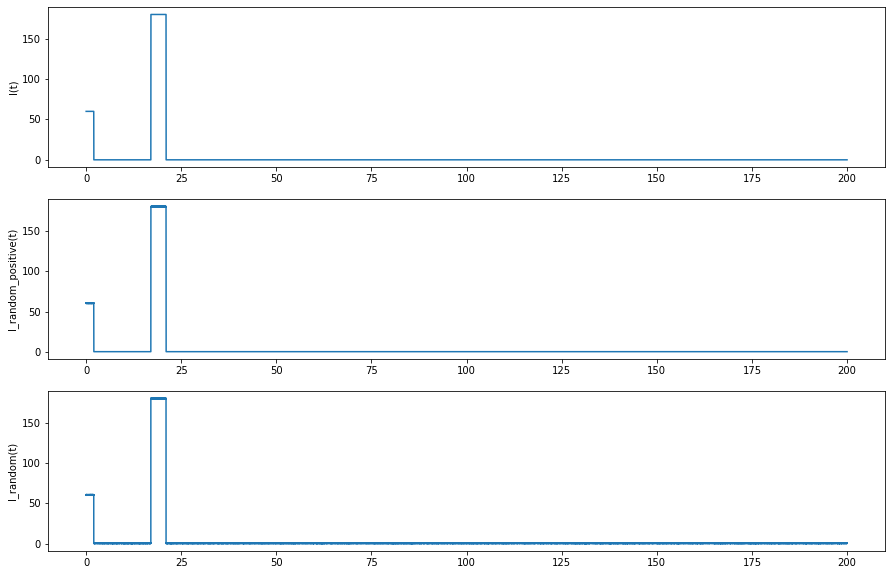

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.ylabel('I(t)')
I_ = list(map(I_t, t))
plt.plot(t, I_)

plt.subplot(3, 1, 2)
plt.ylabel('I_random_positive(t)')
I_ = list(map(I_t_random_positive, t))
plt.plot(t, I_)

plt.subplot(3, 1, 3)
plt.ylabel('I_random(t)')
I_ = list(map(I_t_random, t))
plt.plot(t, I_)

/Users/aleksandra.malysheva/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


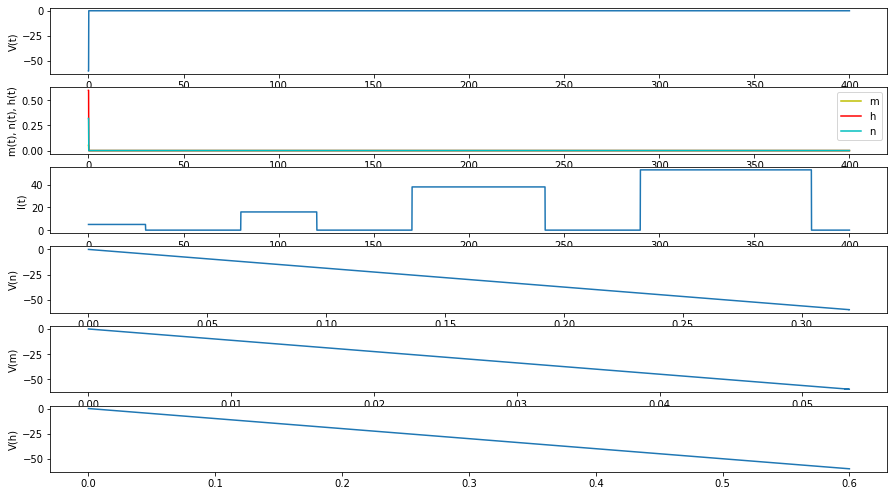

In [11]:
gap = 50
intervals = [30, 40, 70, 90]
current = [5, 16, 38, 53]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t_random, 0, 1,))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

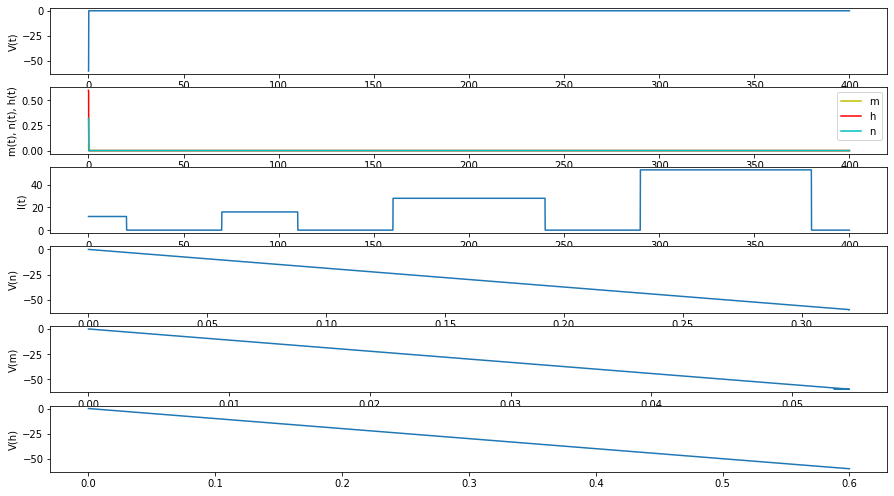

In [12]:
gap = 50
intervals = [20, 40, 80, 90]
current = [12, 16, 28, 53]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t_random, 0, 0.1,))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

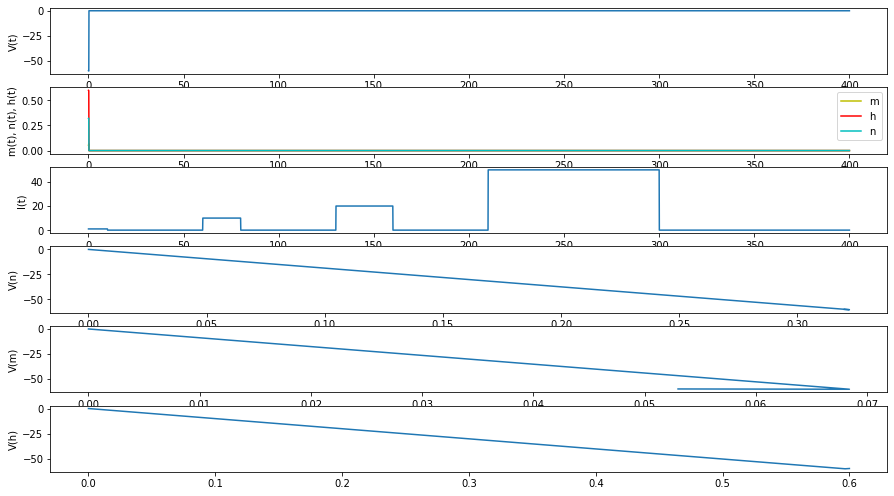

In [13]:
gap = 50
intervals = [10, 20, 30, 90]
current = [1, 10, 20, 50]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t_random, 0, 0.01, ))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

### I_t_random_positive

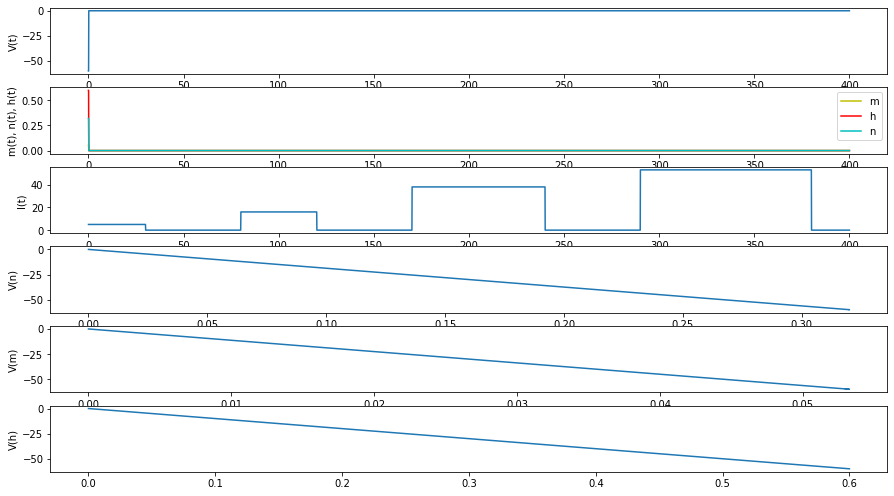

In [14]:
gap = 50
intervals = [30, 40, 70, 90]
current = [5, 16, 38, 53]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t_random_positive, 0, 1, ))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

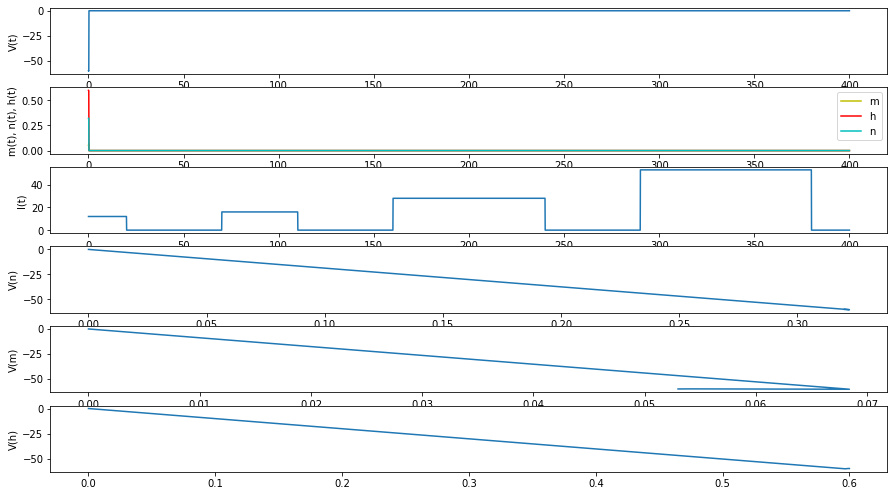

In [15]:
gap = 50
intervals = [20, 40, 80, 90]
current = [12, 16, 28, 53]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t_random, 0, 0.1, ))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

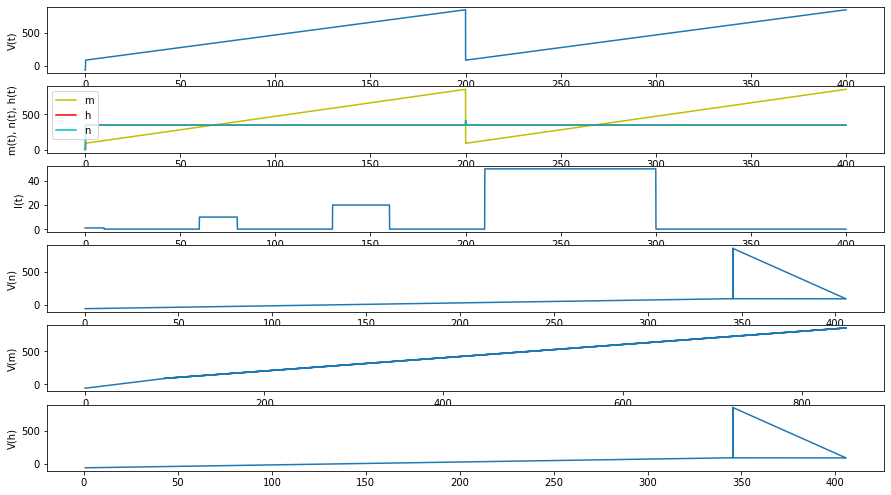

In [16]:
gap = 50
intervals = [10, 20, 30, 90]
current = [1, 10, 20, 50]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t_random, 0, 0.01,))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

# Анализ

In [17]:
При добавление случайного шума спайки случаются намного реже. Чем меньше шум, тем больше происходит спаек.

SyntaxError: invalid syntax (<ipython-input-17-9a27fce7abdd>, line 1)